<a target="_blank" href="https://colab.research.google.com/github/Sebelino/DD2424-project/blob/main/e1_sebastian.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
%load_ext autoreload
%autoreload 2

import os
import socket

repo_name = "DD2424-project"
dep_filename = "download_dataset.py"
cwd = os.getcwd()
hostname = socket.gethostname()

print(f"Host: {hostname}")
print(f"You are here: {cwd}")

if os.path.exists(dep_filename):
    print(f"{dep_filename} is in your current directory. Assuming you are in the root of the repository.")
elif not os.path.exists(repo_name):
    print(f"Cloning repo and fetching {dep_filename}...")
    !git clone https://github.com/Sebelino/DD2424-project
    !cp DD2424-project/download_dataset.py .
else:
    !git -C DD2424-project pull --rebase
    !cp DD2424-project/download_dataset.py .

Host: deeplearning-vm
You are here: /home/sebelino/pycharm_deployment
download_dataset.py is in your current directory. Assuming you are in the root of the repository.


# Train model

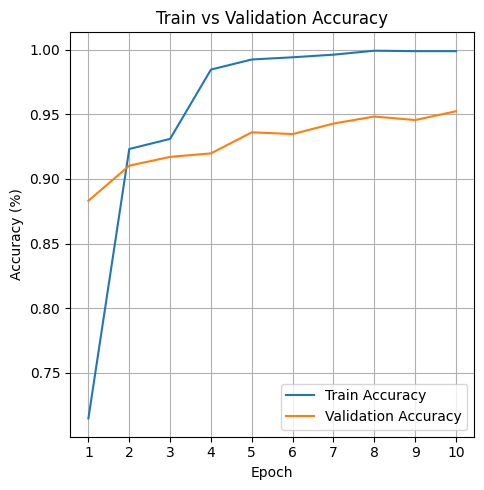

{
    "epochs": [
        1,
        2,
        3,
        4,
        5,
        6,
        7,
        8,
        9,
        10
    ],
    "training_accuracies": [
        0.7146739130434783,
        0.923233695652174,
        0.931046195652174,
        0.9847146739130435,
        0.9925271739130435,
        0.9942255434782609,
        0.9962635869565217,
        0.9993206521739131,
        0.9989809782608695,
        0.9989809782608695
    ],
    "training_elapsed": 143.1146024640002,
    "training_losses": [
        1.6689337611846302,
        0.47329614408638165,
        0.25059353301058646,
        0.07627233775818477,
        0.043067703486683415,
        0.03103300376349817,
        0.019521054802917995,
        0.010683025366312864,
        0.008937175521050054,
        0.007392493995923914
    ],
    "update_steps": [
        93,
        185,
        277,
        369,
        461,
        553,
        645,
        737,
        829,
        921
    ],
    "validation_accuracies"

In [ ]:
from evaluation import evaluate_with_train_val_plot, evaluate_test_accuracy_and_misclassified
from run import run
%reload_ext autoreload
%autoreload 2

from determinism import Determinism

determinism = Determinism(seed=42).sow()  # Keep this before any torch import

from training import TrainParams, NagParams

training_params = TrainParams(
    seed=determinism.seed,
    batch_size=32,
    architecture="resnet50",
    n_epochs=10,
    optimizer=NagParams(
        learning_rate=0.01,
        weight_decay=1e-4,
        momentum=0.9,
    ),
    freeze_layers=True,
    unfreezing_epochs=(3, 6),
    validation_freq=1,
    time_limit_seconds=None,
    val_acc_target=None,
)

invalidate_cache_entry = False
if invalidate_cache_entry:
    run.call_and_shelve(training_params).clear()

result = run(training_params)

evaluate_with_train_val_plot(result)
print(result.json_dumps())

# Test model

In [9]:
from training import Trainer
from torch.utils.data import DataLoader
from datasets import load_dataset

test_dataset = load_dataset("test", Trainer.make_transform(training_params))
test_loader = DataLoader(
    test_dataset,
    batch_size=training_params.batch_size,
    shuffle=False,
    num_workers=2,
    worker_init_fn=Determinism.data_loader_worker_init_fn(training_params.seed),
)
print(f"Test size: {len(test_loader.dataset)}")

evaluate_test_accuracy_and_misclassified(result, test_loader, test_dataset)


Test size: 3669


AttributeError: 'TrainingResult' object has no attribute 'trainer'